## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
# import
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = bitstamp_df = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
    index_col='Timestamp',
    infer_datetime_format=True,
    parse_dates=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = coinbase_df = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col='Timestamp',
    infer_datetime_format=True,
    parse_dates=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE
bitstamp_df.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
bitstamp_df = bitstamp_df.dropna()

In [8]:
bitstamp_df.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [9]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$", "")
bitstamp_df.head()

C:\Users\gaode\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gaode\anaconda3\envs\dev\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp_df.loc[:,"Close"] = bitstamp_df.loc[:, "Close"].astype("float")
bitstamp_df.dtypes

C:\Users\gaode\anaconda3\envs\dev\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp_df.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [12]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE
coinbase_df.isnull().sum()
coinbase_df = coinbase_df.dropna()
coinbase_df.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [13]:
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$","")
coinbase_df.head()

C:\Users\gaode\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [14]:
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].astype("float")
coinbase_df.dtypes

C:\Users\gaode\anaconda3\envs\dev\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame

bitstamp_sliced_df = bitstamp_df.loc[:,"Close"]
# Review the first five rows of the DataFrame
bitstamp_sliced_df.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [16]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFram
coinbase_sliced_df = coinbase_df.loc[:, "Close"]

# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced_df.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [17]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced_df.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [18]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced_df.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'bitstamp_sliced'}, xlabel='Timestamp'>

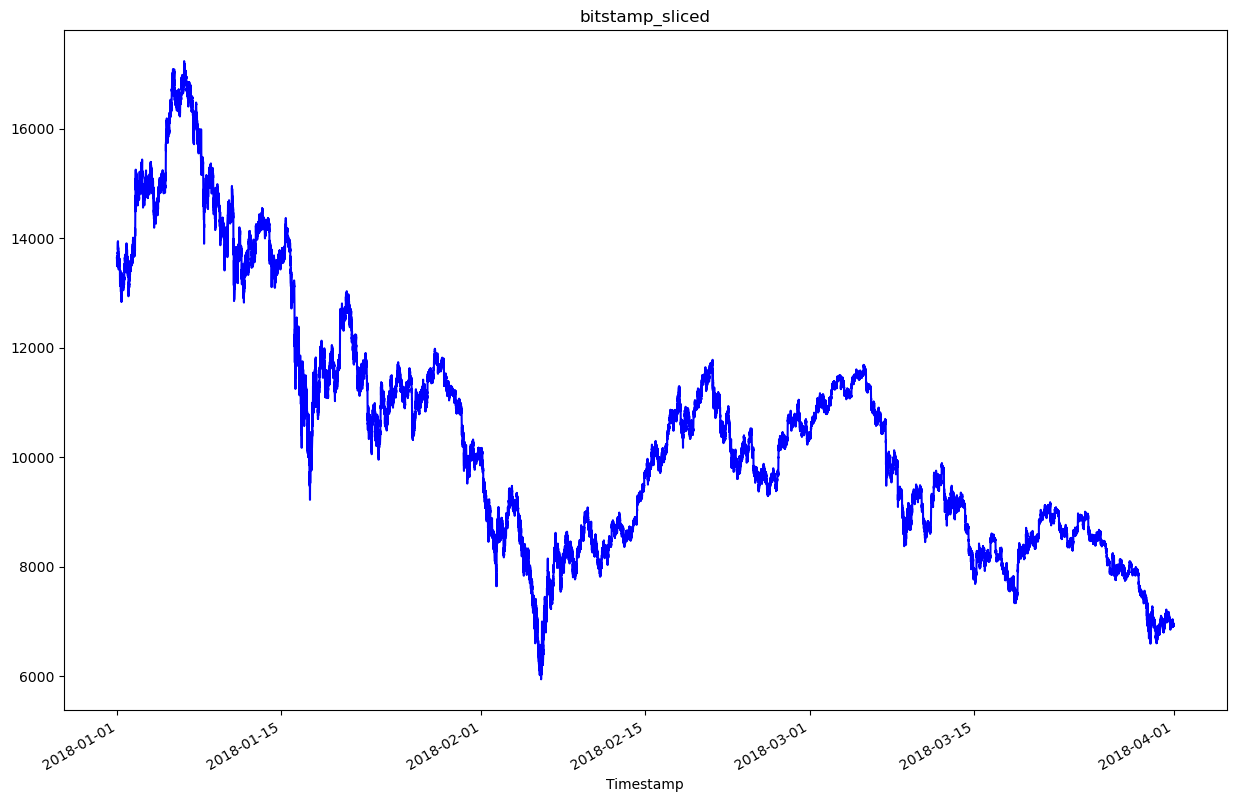

In [19]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp_sliced_df.plot(figsize=(15, 10), title="bitstamp_sliced", color="blue")

<AxesSubplot:title={'center':'coinbase_sliced'}, xlabel='Timestamp'>

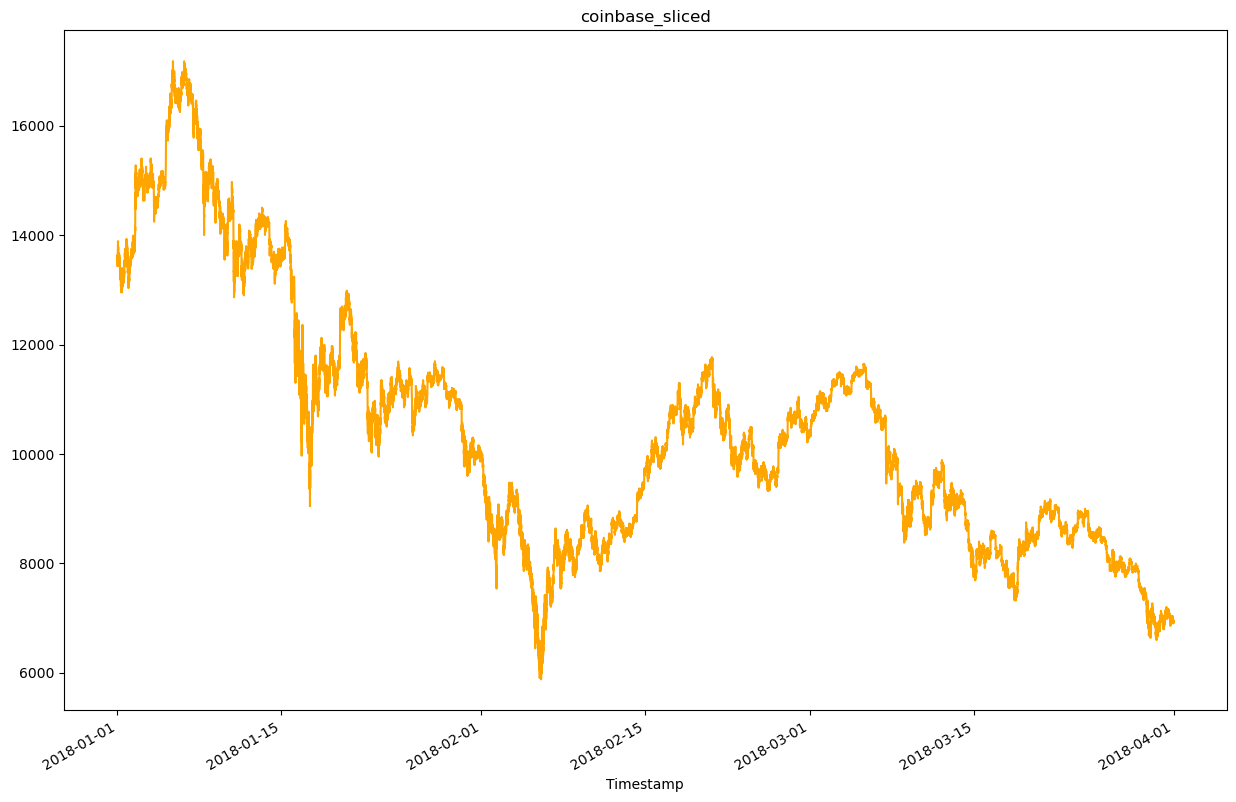

In [20]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase_sliced_df.plot(figsize=(15, 10), title="coinbase_sliced", color="orange")

<AxesSubplot:title={'center':'BITSTAMP v. COINBASE'}, xlabel='Timestamp'>

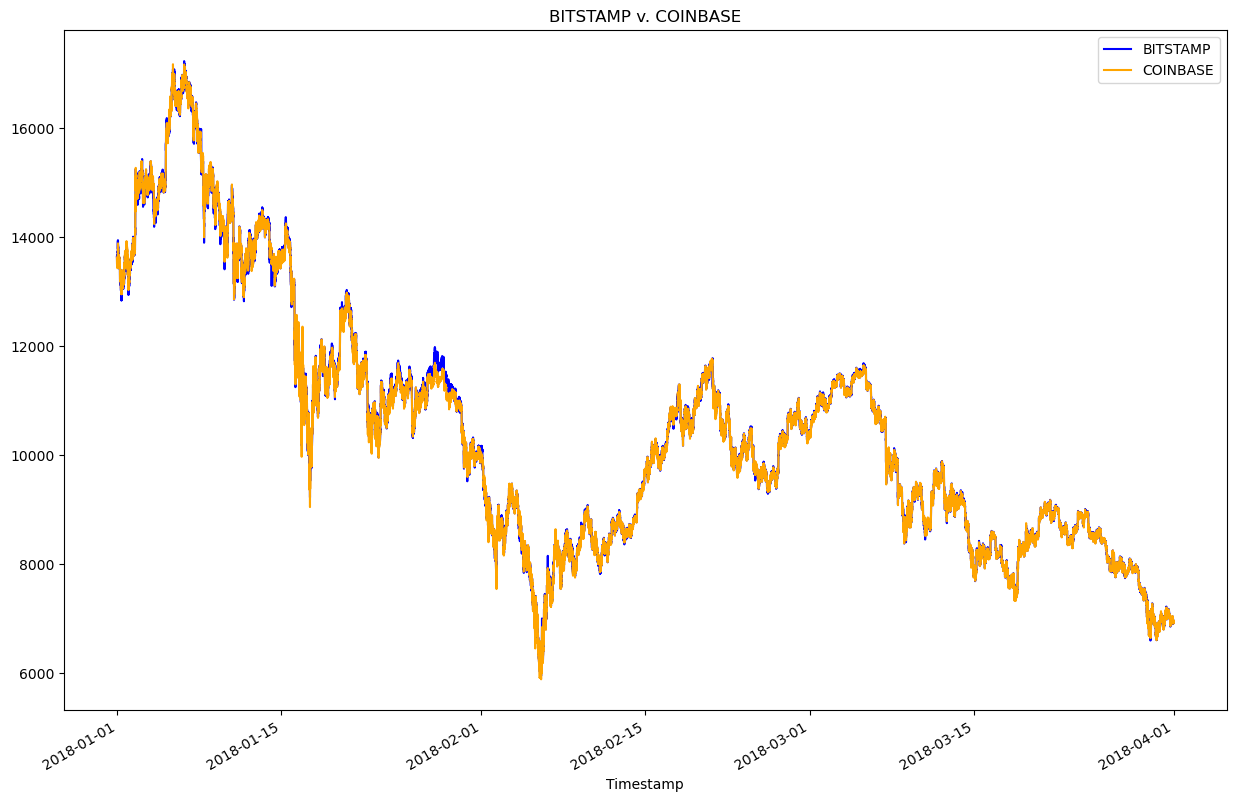

In [21]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced_df.plot(legend=True, figsize=(15, 10), title="BITSTAMP v. COINBASE", color="blue", label="BITSTAMP")
coinbase_sliced_df.plot(legend=True, figsize=(15, 10), color="orange", label="COINBASE")

<AxesSubplot:title={'center':'BITSTAMP v. COINBASE'}, xlabel='Timestamp'>

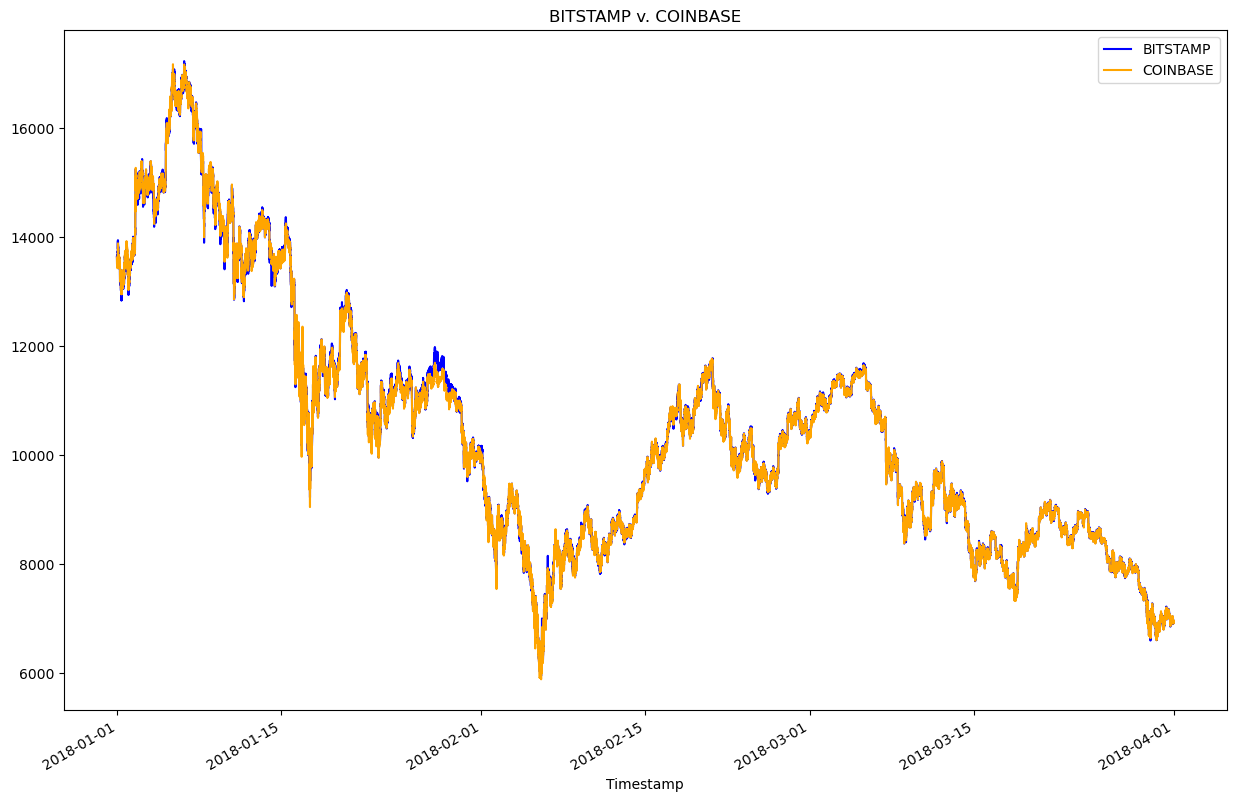

In [22]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced_df.plot(legend=True, figsize=(15, 10), title="BITSTAMP v. COINBASE", color="blue", label="BITSTAMP")
coinbase_sliced_df.plot(legend=True, figsize=(15, 10), color="orange", label="COINBASE")

<AxesSubplot:title={'center':'January 2018'}, xlabel='Timestamp'>

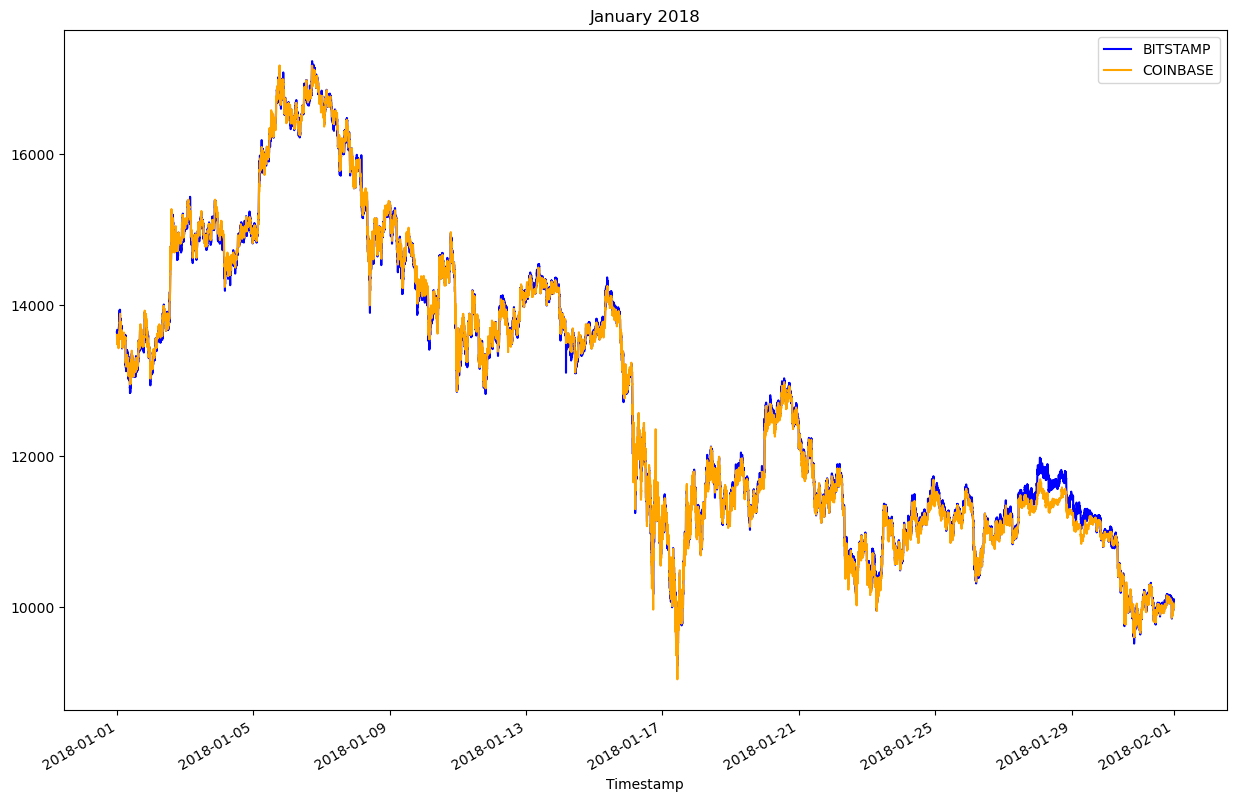

In [23]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced_df.loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15, 10), title="January 2018", color="blue", label="BITSTAMP")
coinbase_sliced_df.loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="COINBASE")

<AxesSubplot:title={'center':'March 2018'}, xlabel='Timestamp'>

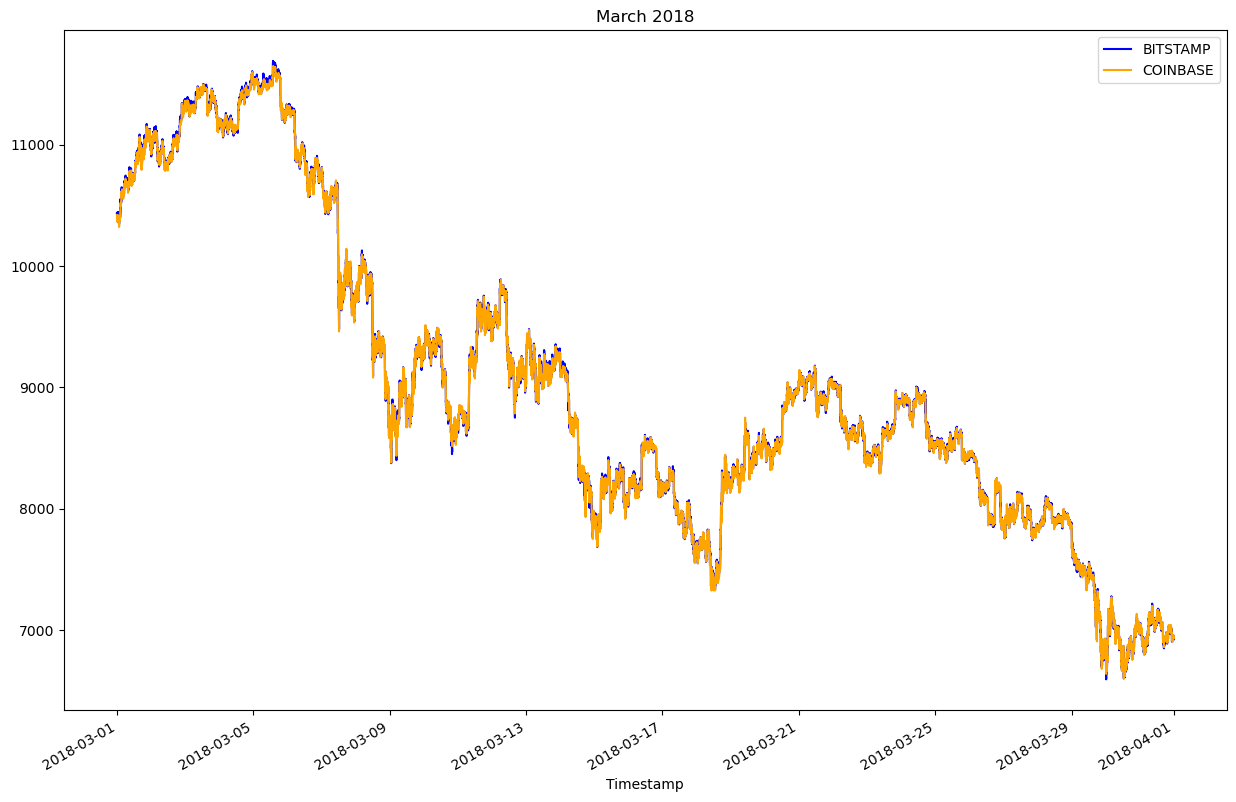

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period late in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced_df.loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15, 10), title="March 2018", color="blue", label="BITSTAMP")
coinbase_sliced_df.loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="COINBASE")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** 
According to the visualizations of the different time periods, as time progressed, the degree of spread bacame smaller.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 5, 2018'}, xlabel='Timestamp'>

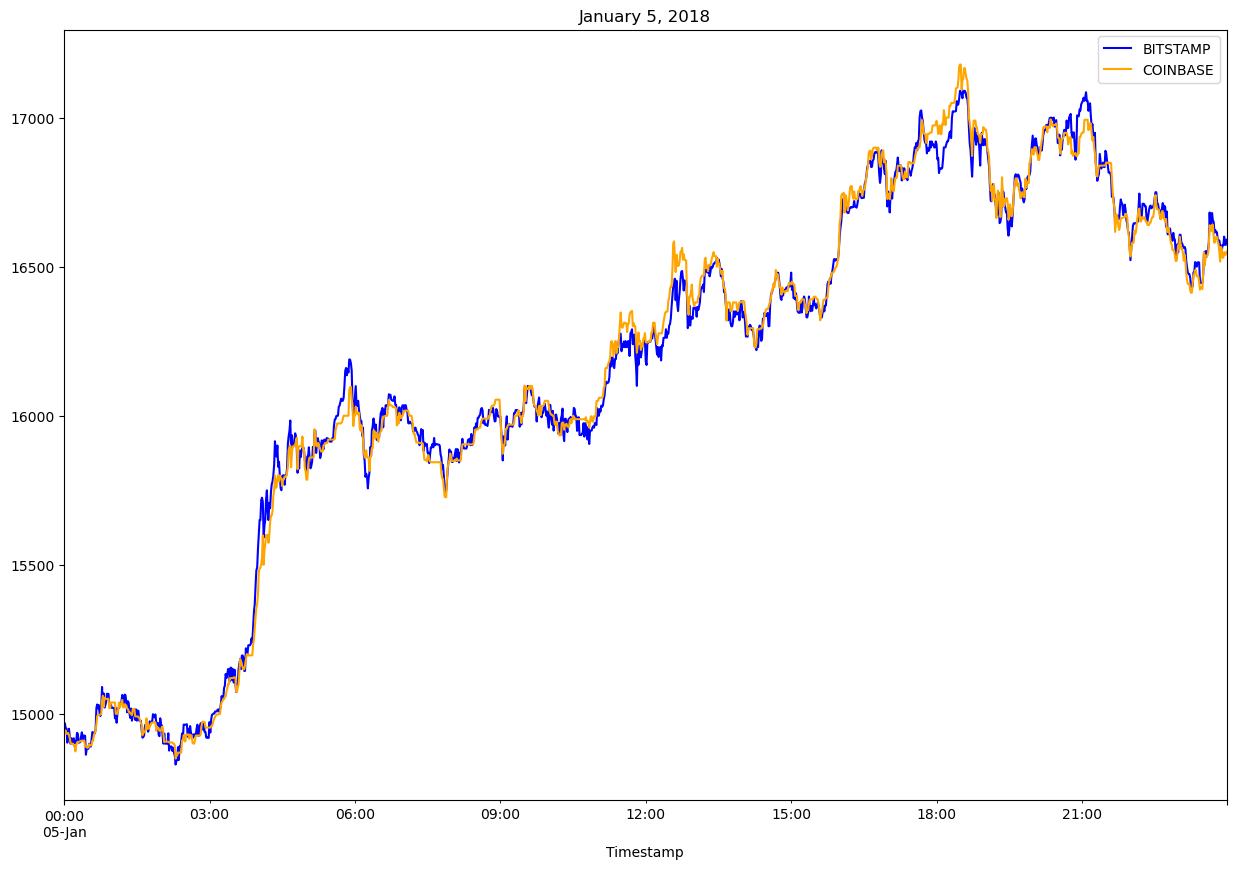

In [25]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp_sliced_df.loc['2018-01-5'].plot(
    legend=True, figsize=(15, 10), title="January 5, 2018", color="blue", label="BITSTAMP")
coinbase_sliced_df.loc['2018-01-5'].plot(
    legend=True, figsize=(15, 10), color="orange", label="COINBASE")

In [26]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced_df.loc['2018-01-05']- coinbase_sliced_df.loc['2018-01-05']
arbitrage_spread_early.describe()

count    1440.000000
mean       -0.650535
std        44.027768
min      -150.850000
25%       -26.000000
50%         0.055000
75%        24.477500
max       216.930000
Name: Close, dtype: float64

<AxesSubplot:>

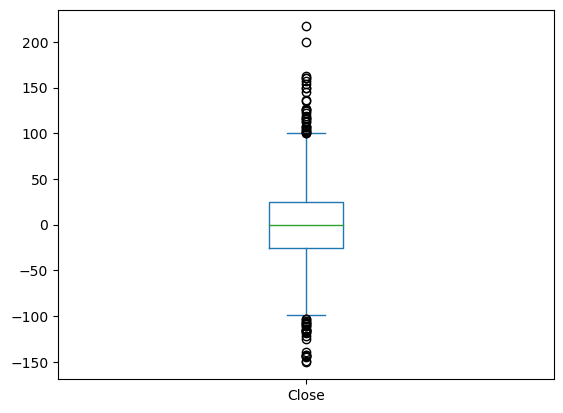

In [27]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'February 19, 2018'}, xlabel='Timestamp'>

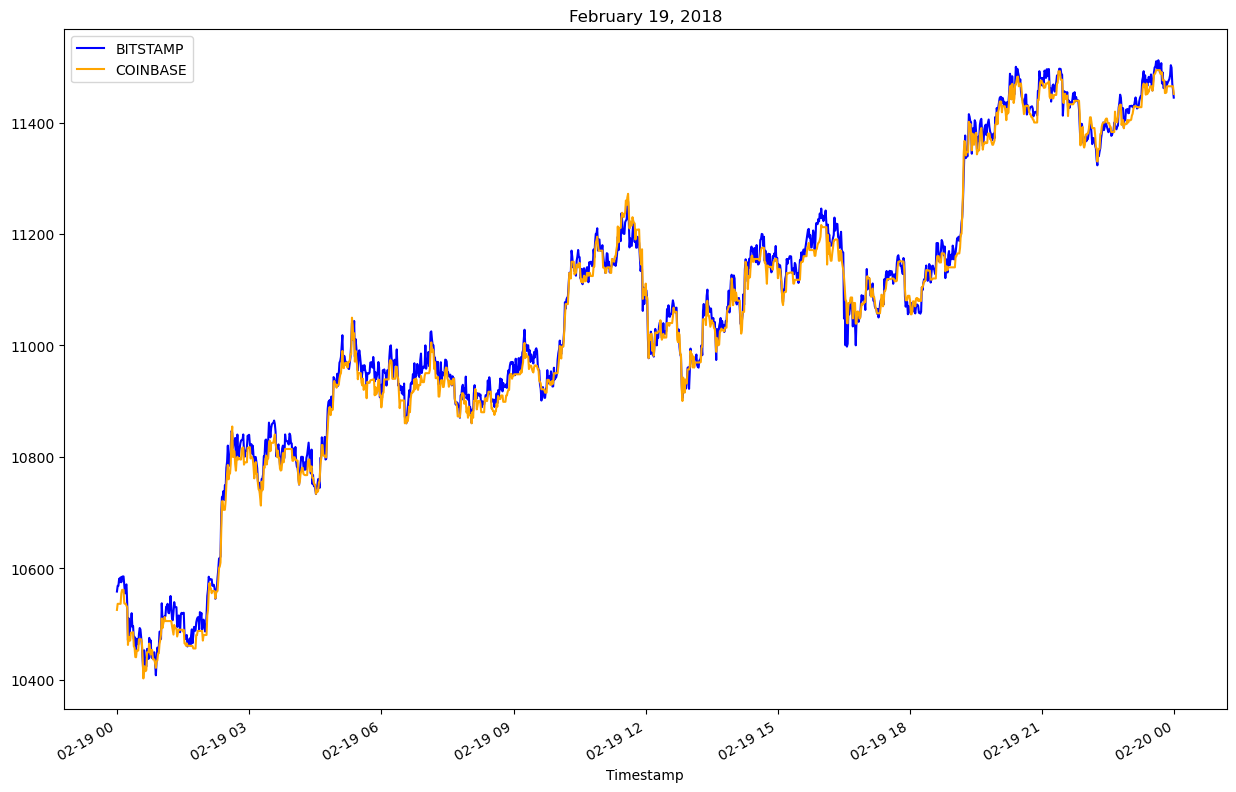

In [28]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp_sliced_df.loc['2018-02-19'].plot(
    legend=True, figsize=(15, 10), title="February 19, 2018", color="blue", label="BITSTAMP")
coinbase_sliced_df.loc['2018-02-19'].plot(
    legend=True, figsize=(15, 10), color="orange", label="COINBASE")

In [29]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced_df.loc['2018-02-19'] - coinbase_sliced_df.loc['2018-02-19']

# Generate summary statistics 
# YOUR CODE HERE
arbitrage_spread_middle.describe()                                                                                        

count    1438.000000
mean       10.350612
std        15.656903
min       -81.000000
25%         0.965000
50%        11.185000
75%        21.007500
max        49.910000
Name: Close, dtype: float64

<AxesSubplot:>

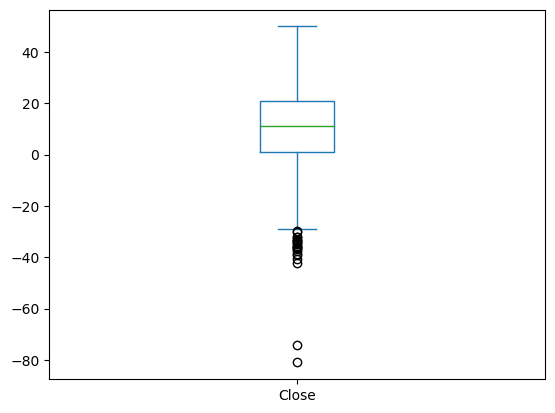

In [30]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'March 29, 2018'}, xlabel='Timestamp'>

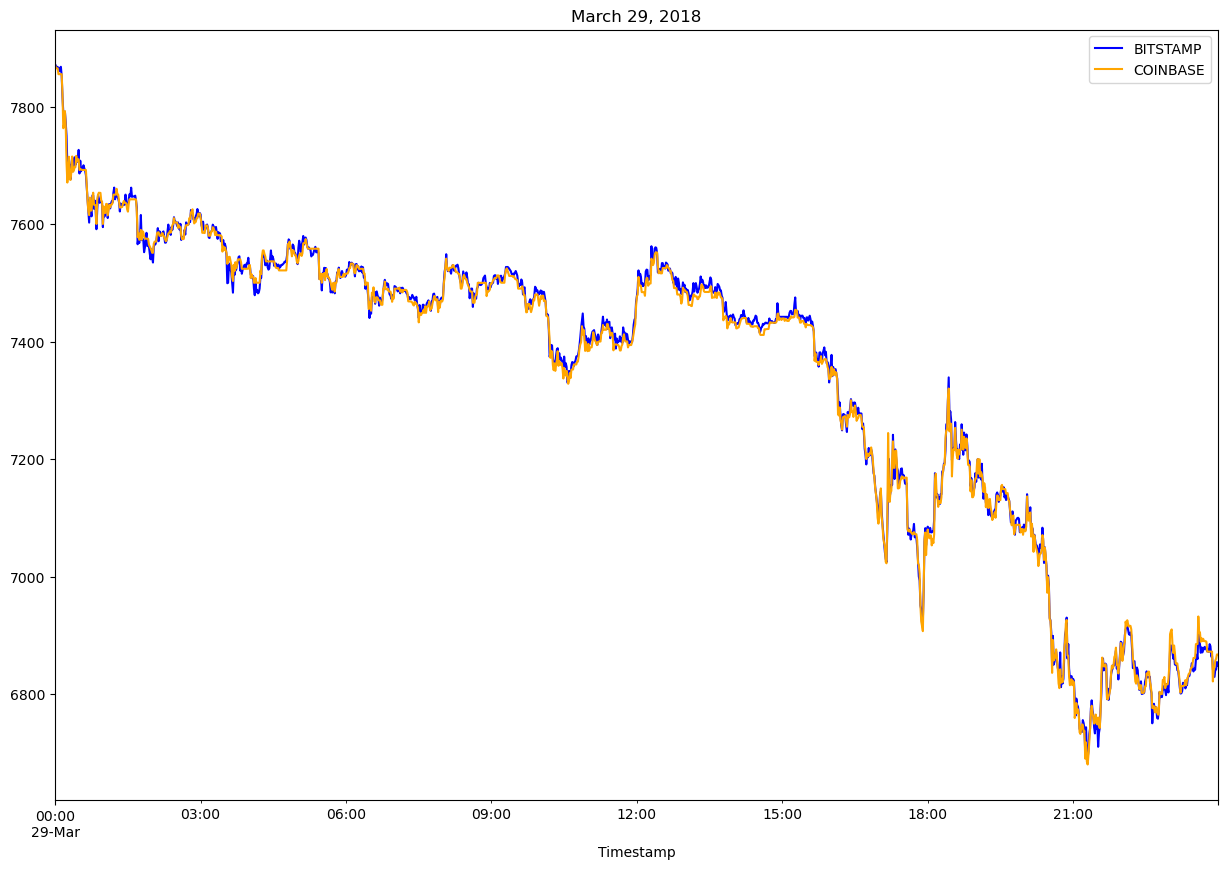

In [31]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp_sliced_df.loc['2018-03-29'].plot(
    legend=True, figsize=(15, 10), title="March 29, 2018", color="blue", label="BITSTAMP")
coinbase_sliced_df.loc['2018-03-29'].plot(
    legend=True, figsize=(15, 10), color="orange", label="COINBASE")

In [32]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced_df.loc['2018-03-29'] - coinbase_sliced_df.loc['2018-03-29']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean        2.787611
std        10.030143
min       -89.900000
25%        -2.942500
50%         3.645000
75%         9.132500
max        45.600000
Name: Close, dtype: float64

<AxesSubplot:>

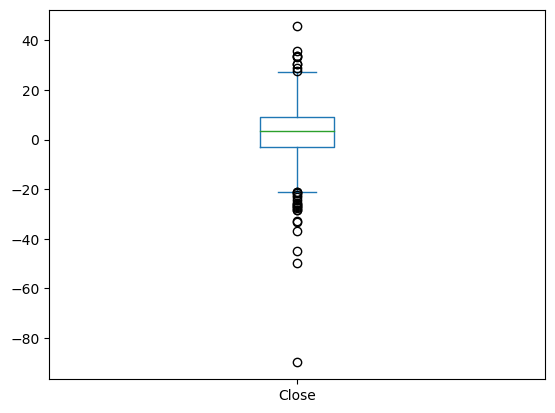

In [33]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [34]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced_df.loc['2018-01-05'] - coinbase_sliced_df.loc['2018-01-05']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
arbitrage_spread_early > 0
arbitrage_spread_early.describe()

count    1440.000000
mean       -0.650535
std        44.027768
min      -150.850000
25%       -26.000000
50%         0.055000
75%        24.477500
max       216.930000
Name: Close, dtype: float64

In [35]:
arbitrage_spread_middle = bitstamp_sliced_df.loc['2018-02-19'] - coinbase_sliced_df.loc['2018-02-19']
arbitrage_spread_middle > 0
arbitrage_spread_middle.describe()

count    1438.000000
mean       10.350612
std        15.656903
min       -81.000000
25%         0.965000
50%        11.185000
75%        21.007500
max        49.910000
Name: Close, dtype: float64

In [36]:
arbitrage_spread_late = bitstamp_sliced_df.loc['2018-03-29'] - coinbase_sliced_df.loc['2018-03-29']
arbitrage_spread_late > 0
arbitrage_spread_late.describe()

count    1440.000000
mean        2.787611
std        10.030143
min       -89.900000
25%        -2.942500
50%         3.645000
75%         9.132500
max        45.600000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [37]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0]/bitstamp_sliced_df.loc['2018-01-05']

# Review the spread return DataFrame
# YOUR CODE HERE
spread_return_early.head()                                                                                          

Timestamp
2018-01-05 00:00:00    0.000401
2018-01-05 00:01:00    0.001613
2018-01-05 00:02:00    0.000470
2018-01-05 00:03:00    0.001076
2018-01-05 00:04:00         NaN
Name: Close, dtype: float64

In [38]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]/bitstamp_sliced_df.loc['2018-02-19']

# Review the spread return DataFrame
# YOUR CODE HERE
spread_return_middle.head()                                                                                          

Timestamp
2018-02-19 00:00:00    0.003126
2018-02-19 00:01:00    0.003053
2018-02-19 00:02:00    0.003063
2018-02-19 00:03:00    0.004261
2018-02-19 00:04:00    0.003674
Name: Close, dtype: float64

In [39]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late[arbitrage_spread_late > 0]/bitstamp_sliced_df.loc['2018-03-29']

# Review the spread return DataFrame
# YOUR CODE HERE
spread_return_late.head()                                                                                          

Timestamp
2018-03-29 00:00:00    0.000185
2018-03-29 00:01:00    0.000498
2018-03-29 00:02:00    0.000282
2018-03-29 00:03:00    0.000285
2018-03-29 00:04:00    0.001217
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [40]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_early.head()

Timestamp
2018-01-05 04:02:00    0.010415
2018-01-05 04:03:00    0.010224
2018-01-05 04:04:00    0.013802
2018-01-05 04:05:00    0.012719
Name: Close, dtype: float64

In [41]:
profitable_trades_early.describe()

count    4.000000
mean     0.011790
std      0.001756
min      0.010224
25%      0.010367
50%      0.011567
75%      0.012990
max      0.013802
Name: Close, dtype: float64

In [42]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [43]:
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [44]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]
# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

In [45]:
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [46]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# of you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_early = spread_return_early[spread_return_early > 0.1]
spread_return_early.head(10)


Timestamp
2018-01-05 00:00:00    0.000401
2018-01-05 00:01:00    0.001613
2018-01-05 00:02:00    0.000470
2018-01-05 00:03:00    0.001076
2018-01-05 00:04:00         NaN
2018-01-05 00:05:00         NaN
2018-01-05 00:06:00    0.001337
2018-01-05 00:07:00    0.000461
2018-01-05 00:08:00         NaN
2018-01-05 00:09:00    0.001218
Name: Close, dtype: float64

In [47]:
spread_return_early.describe()

count    7.230000e+02
mean     1.995051e-03
std      1.858543e-03
min      5.952381e-07
25%      7.498757e-04
50%      1.497821e-03
75%      2.557506e-03
max      1.380231e-02
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [48]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced_df.loc['2018-01-05']
profit_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
# YOUR CODE HERE
profit_per_trade_early.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [49]:
profit_middle = profitable_trades_middle * bitstamp_sliced_df.loc['2018-02-19']
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [50]:
profit_late = profitable_trades_late * bitstamp_sliced_df.loc['2018-03-29']
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [52]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

In [51]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_sum_early = profit_per_trade_early.sum
profit_sum_early

<bound method NDFrame._add_numeric_operations.<locals>.sum of Series([], Name: Close, dtype: float64)>

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [53]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [54]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE

SyntaxError: invalid syntax (2792105250.py, line 2)

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE